# Anlysis of Contendention Data

## Catalog

* [Background Knowledge](#knowledge)
* [Data Example](#data)
* [Simple Data Exploration of the Designed Data](#explore)
    + [Data Description](#describe)
    + [Frequent Victim and Contender](#frequent)
* [Apriori Mine the Assocation Rules](#mine)
    + [Show All rules](#allrules)
    + [Analyze some meaningfull rules](#analyze)
 
## Working
* improve the design of data generation
* take differnt contendtion types into consideration

<a id = "knowledge"></a>
## BackGround Knowledge

* Support
> The support of X with respect to  T is defined as the proportion of transactions t in the dataset which contains the itemset  X

$$Support(X)=\frac{number\quad of\quad X\quad in\quad all\quad samples}{all\quad samples}$$
* Confidence
> The confidence value of a rule, X => Y , with respect to a set of transactions T, is the proportion of the transactions that contains X which also contains Y.

$$Confidence(X => Y)= \frac{Support(XY)}{Support(X)}$$
* Lift
> The ratio of the observed support to that expected if X and Y were independent
$$Lift(X => Y) = \frac{Confidence(X => Y)}{Support(Y)}$$

<a id = "data"></a>
## Data Example (generated by designed)

In this example, A B C D represent differnt workload names, A1 means, workload A is a contender, B2 means workload B is a victim, type= 1 means this is a LLC contention.  A3 means this is an independent workload, not influenced by others, so the contention type is 0.

    ['A1','B2','C2','D2]---- 1
    
    ['A3','C3','D3']---------0

In [1]:
%matplotlib inline

import sys 
import os
import ast

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sys.path.append(os.path.abspath("C:\\Users\\yil1\\Documents\\ResourceManager\\frequent\\src"))
from ap import apriori,SupportRecord,RelationRecord,DetailRecord

<a id = "explore"></a>
## Simple Data Exploration of the Designed Data


<a id = "describe"></a>
### Data Description

show some data examples

In [2]:
# read the generated data and show some examples
df = pd.read_csv('../data/data_pd.csv',dtype=object) 
print('The size of total data is {}'.format(df.shape[0]))
df.head(5)

The size of total data is 12000


,trans,type
0,"['E3', 'C3', 'A3']",0
1,['D3'],0
2,"['B3', 'A3', 'C3', 'E3']",0
3,"['C3', 'B3', 'A3', 'E3']",0
4,"['C3', 'A3', 'D3', 'E3']",0


In [3]:
# read the generated data which is contention and show some example
df_c = df[df['type']!= '0']
print('The size of total contention data is {}'.format(df_c.shape[0]))
df_c.head(5)

The size of total contention data is 1166


,trans,type
12,"['D2', 'C1']",2
13,"['B1', 'C2']",3
33,"['C2', 'D2', 'A1', 'B2']",2
42,"['B1', 'D2']",3
43,"['D2', 'C2', 'A1', 'E2']",2


Show the workload pairs which occurs more than 5 times in the contention data, the occurance of workload pairs is samll because we generate it by random, in real environment it will be large.

In [4]:
df_c['trans'].value_counts() [df_c['trans'].value_counts()>5 ]

['B1']                      37
['D1']                      30
['A1']                      26
['D1', 'B2']                12
['C1', 'A2']                12
['A1', 'C2']                10
['A2', 'B1']                10
['C1', 'B2']                10
['A1', 'D2']                 9
['A2', 'D1']                 9
['A1', 'B2']                 9
['D1', 'A2']                 9
['B2', 'C1']                 8
['D2', 'A1']                 8
['D2', 'C1']                 8
['D2', 'B1']                 8
['B2', 'D1']                 7
['B1', 'C2']                 7
['D1', 'C2']                 7
['C2', 'D1']                 7
['B2', 'A1']                 7
['D2', 'C1', 'A2']           6
['A2', 'C1', 'E2']           6
['C2', 'E2', 'A1']           6
['B1', 'A2']                 6
['B2', 'E1', 'A2', 'C2']     6
['B2', 'D2', 'A1']           6
Name: trans, dtype: int64

In [5]:
def get_summary(df):

    total_items = []
    total_num_transaction = 0
    total_item_index_map = {}
    item_len_index = []

    for items in df:
        items_list = ast.literal_eval(items)
        for item in items_list:
            if item not in total_items:
                total_items.append(item)
                total_item_index_map[item]=set()
            total_item_index_map[item].add(total_num_transaction)
        total_num_transaction += 1
    total_items = sorted(total_items)
    for item in total_items:
        item_len_index.append(len(total_item_index_map[item]))
    return total_items,total_num_transaction,total_item_index_map,item_len_index


<a id="frequent"></a>
### Frequent Victim and Contender
Show The distribution of all workload(with contention or not) in our generated dataset

Text(0.5,1,'All Contention Pairs')

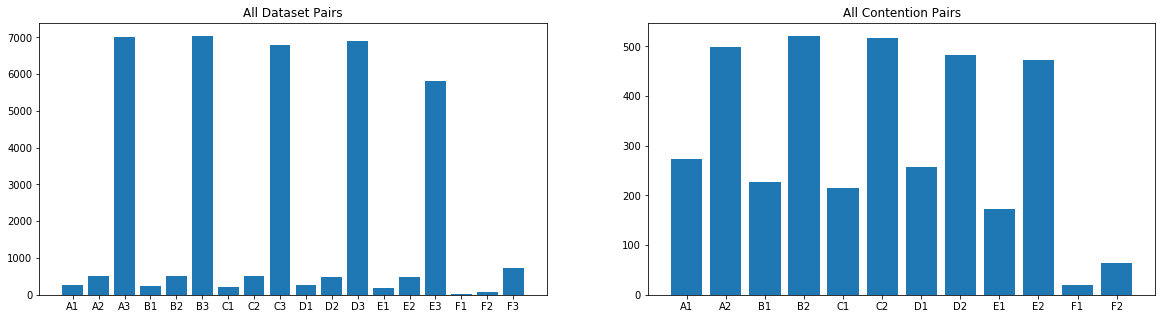

In [6]:
plt.figure(1,figsize=(20,5))
total_items,total_num_transaction,total_item_index_map,item_len_index = get_summary(df['trans'].values)
plt.subplot(121)
plt.bar(total_items,item_len_index,align='center')
plt.title("All Dataset Pairs")
plt.subplot(122)
total_items_c,total_num_transaction_c,total_item_index_map_c,item_len_index_c = get_summary(df_c['trans'].values)
plt.bar(total_items_c,item_len_index_c,align='center')
plt.title("All Contention Pairs")

<a id = "frequent"></a>
We believe that: (as we said before 1 represent contender,2 represent victim, 3 represent independent)

Frequent Victim is to calculate max $$ Confidence(X) = \frac{X2}{X1+X2+X3} $$
Then X is the frequnet victim.

Frequent Contender is to calculate max $$ Confidence(X) = \frac{X1}{X1+X2} $$
Then X is the frequnet contender



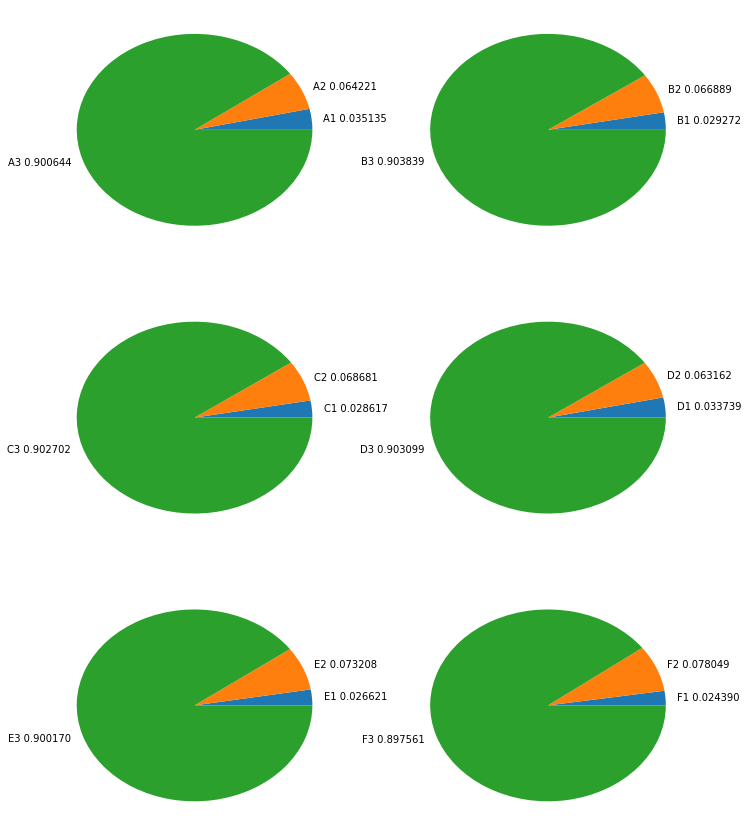

In [7]:
item_source = ['A','B','C','D','E','F']
length = len(item_source)
contender_types = ['1','2','3']
plt.figure(1, figsize=(10, 15))
plt.subplots_adjust(left=0.05, right=0.95)

for i in range(6):
    plt.subplot(3,2,i+1)
    x = [ len(total_item_index_map[item_source[i]+t]) for t in contender_types]
    plt.pie(x= x,labels = [ '{}{} {:.6f}'.format(item_source[i],t,x[j]/sum(x)) for j,t in enumerate(contender_types)] )

From the above chart we can find that the percent of F2 is larger than A2,B2,C2,D2,E2,F2, so F workload is more vulnearable than other kind of workloads. 
So, we got a conclusion that **F is the most frequent victim**.

As for frequnet contender, we can also calculate that X1/X1+X2,
and we got a conclusion that **B1 is the most frequnet contender**.（data changes, the result will also change）


<a id = "mine"></a>
## Mine data relations

<a id = "allrules"></a>
### Mine all rules
you can read the mine codes are in src/ap.py

If we set min support as 0.001, max frequent item set length as 5, min confidence as 0.5, min lift as 1.0, and mine rules from the contendetion data.

All the rules that satisfy all conditions are listed in the output result

In [10]:

min_support = 0.001
max_length = 5
min_confidence = 0.6
min_lift = 1.5
transactions = [ ast.literal_eval(items)  for items in df_c['trans'].values ]
relation_records = apriori(transactions,max_length,min_support,min_confidence,min_lift)
relation_records = list(relation_records)
for record in relation_records:
    print("Item {} Support {}".format(list(record.items),record.support))
    for detail in record.detail_records:
        print("      base{},add {},confidence {},lift {}".format(list(detail.item_base),list(detail.item_add),detail.confidence,detail.lift))

Item ['E1', 'A2'] Support 0.10034305317324185
      base['E1'],add ['A2'],confidence 0.680232558139535,lift 1.589481288157711
Item ['F1', 'A2'] Support 0.015437392795883362
      base['F1'],add ['A2'],confidence 0.9,lift 2.103006012024048
Item ['B2', 'F1'] Support 0.0137221269296741
      base['F1'],add ['B2'],confidence 0.7999999999999999,lift 1.7904030710172743
Item ['E1', 'C2'] Support 0.10034305317324185
      base['E1'],add ['C2'],confidence 0.680232558139535,lift 1.5371146565711198
Item ['F1', 'C2'] Support 0.012006861063464836
      base['F1'],add ['C2'],confidence 0.7,lift 1.581782945736434
Item ['F1', 'D2'] Support 0.012864493996569469
      base['F1'],add ['D2'],confidence 0.75,lift 1.81055900621118
Item ['F2', 'D2'] Support 0.03516295025728988
      base['F2'],add ['D2'],confidence 0.640625,lift 1.5465191511387164
Item ['F1', 'E2'] Support 0.014579759862778732
      base['F1'],add ['E2'],confidence 0.85,lift 2.0953488372093023
Item ['B2', 'F2', 'A1'] Support 0.00943396226415

<a id ="analyze"></a>
### Analyze meanfuling rules

In this section, we analyze the support items that coatines contender, and in the X => Y relations, X contains contender, this kind of rules is meaningful to us.

In [11]:
def check_if_contains_contender(items):
    for item in items:
        if '1' in item:
            return True
    return False
for record in relation_records:
    if check_if_contains_contender(record.items):
        print("Item {} Support {}".format(list(record.items),record.support))
        for detail in record.detail_records:
            if check_if_contains_contender(detail.item_base):
                print("      base{},add {},confidence {},lift {}".format(list(detail.item_base),list(detail.item_add),detail.confidence,detail.lift))
            else:
                continue
    else:
        continue

Item ['E1', 'A2'] Support 0.10034305317324185
      base['E1'],add ['A2'],confidence 0.680232558139535,lift 1.589481288157711
Item ['F1', 'A2'] Support 0.015437392795883362
      base['F1'],add ['A2'],confidence 0.9,lift 2.103006012024048
Item ['B2', 'F1'] Support 0.0137221269296741
      base['F1'],add ['B2'],confidence 0.7999999999999999,lift 1.7904030710172743
Item ['E1', 'C2'] Support 0.10034305317324185
      base['E1'],add ['C2'],confidence 0.680232558139535,lift 1.5371146565711198
Item ['F1', 'C2'] Support 0.012006861063464836
      base['F1'],add ['C2'],confidence 0.7,lift 1.581782945736434
Item ['F1', 'D2'] Support 0.012864493996569469
      base['F1'],add ['D2'],confidence 0.75,lift 1.81055900621118
Item ['F1', 'E2'] Support 0.014579759862778732
      base['F1'],add ['E2'],confidence 0.85,lift 2.0953488372093023
Item ['B2', 'F2', 'A1'] Support 0.009433962264150943
      base['F2', 'A1'],add ['B2'],confidence 0.6875,lift 1.5386276391554703
Item ['F2', 'C2', 'A1'] Support 0.011

since the combination of workload pairs are randomly generated, so the support of relation record is very small, but in general, the larger support and confidence and lift, the more frequent contender-victim combos.